## Odczytanie plików

In [63]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

# Path to expert and predicted images
folder_path = "results/"
y_Experts = [f'{folder_path}y_val_{i}.png' for i in range(5)]
y_Our = [f'{folder_path}y_pred_{i}.png' for i in range(5)]

# Define the new path for ground truth images
ground_truth_files = [
    "manual1/01_g.tif",
    "manual1/01_h.tif",
    "manual1/02_g.tif",
    "manual1/02_h.tif",
    "manual1/03_g.tif"
]

## Wyświetlanie danych wejściowych


In [64]:
# Function to resize images to a specified size
def resize_image(image, size):
    return np.array(Image.fromarray(image).resize(size, Image.NEAREST))

experts_images = []
our_images = []


# Load expert images
experts_images = []
for file in y_Experts:
    img = Image.open(file).convert('L')
    experts_images.append(np.array(img))

# Load ground truth images
ground_truth_images = []
for file in ground_truth_files:
    img = Image.open(file).convert('L')
    ground_truth_images.append(np.array(img))

# Load predicted images
our_images = []
for file in y_Our:
    img = Image.open(file).convert('L')
    our_images.append(np.array(img))

exp_matrix = np.array(experts_images)
our_matrix = np.array(our_images)

print("Shape of exp_matrix:", exp_matrix.shape)
print("Shape of our_matrix:", exp_matrix.shape)


Shape of exp_matrix: (5, 320, 448)
Shape of our_matrix: (5, 320, 448)


Wyniki ekspertskie:



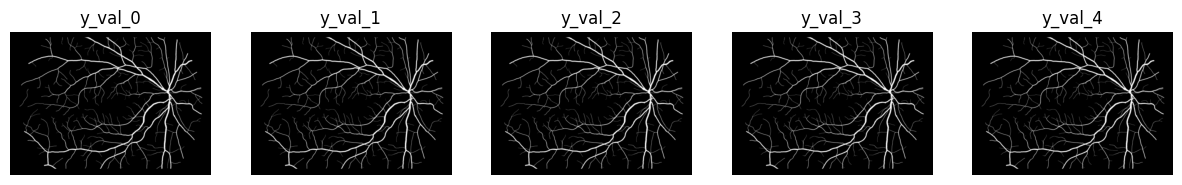

Wyniki nasze:



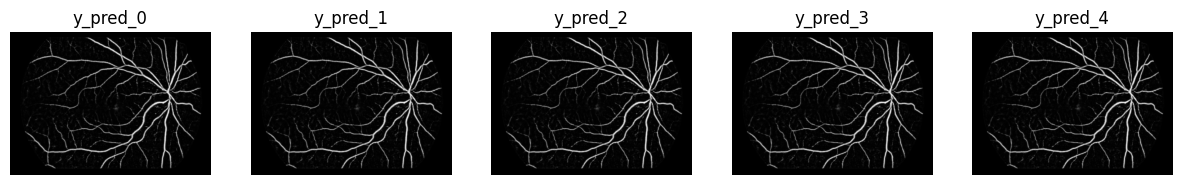

In [55]:
print("Wyniki ekspertskie:\n")
num_images = exp_matrix.shape[0]

fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    ax = axes[i]
    ax.imshow(exp_matrix[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'y_val_{i}')

plt.show()

print("Wyniki nasze:\n")
num_images = our_matrix.shape[0]

fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    ax = axes[i]
    ax.imshow(our_matrix[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'y_pred_{i}')

plt.show()

In [56]:
def calculate_confusion_matrix_and_display(exp_images, pred_images, mask_image, resize_mask=False):
    num_images = len(exp_images)

    if resize_mask:
        mask_resized = resize_image(np.array(mask_image), exp_images[0].shape[::-1])
    else:
        mask_resized = np.array(mask_image)

    mask_array = np.where(mask_resized > threshold, 255, 0)

    for i in range(num_images):
        print(f"Processing confusion matrix for image {i+1}")

        exp_flat = exp_images[i][mask_array == 255].flatten()
        pred_flat = pred_images[i][mask_array == 255].flatten()

        true_positive = np.sum((exp_flat == 255) & (pred_flat == 255))
        false_positive = np.sum((exp_flat == 0) & (pred_flat == 255))
        false_negative = np.sum((exp_flat == 255) & (pred_flat == 0))
        true_negative = np.sum((exp_flat == 0) & (pred_flat == 0))

        total_pixels = true_positive + false_positive + false_negative + true_negative

        true_positive_percent = (true_positive / total_pixels) * 100
        false_positive_percent = (false_positive / total_pixels) * 100
        false_negative_percent = (false_negative / total_pixels) * 100
        true_negative_percent = (true_negative / total_pixels) * 100

        print(f"True Positive for image {i+1}: {true_positive}")
        print(f"False Positive for image {i+1}: {false_positive}")
        print(f"False Negative for image {i+1}: {false_negative}")
        print(f"True Negative for image {i+1}: {true_negative}\n")

        accuracy = (true_positive + true_negative) / total_pixels
        sensitivity = true_positive / (true_positive + false_negative)
        specificity = true_negative / (true_negative + false_positive)
        avg_sens_spec = (sensitivity + specificity) / 2

        print(f"Accuracy for image {i+1}: {accuracy:.4f}")
        print(f"Sensitivity for image {i+1}: {sensitivity:.4f}")
        print(f"Specificity for image {i+1}: {specificity:.4f}")
        print(f"Average Sensitivity and Specificity for image {i+1}: {avg_sens_spec:.4f}\n")

        manual_cm = np.array([[true_positive_percent, false_negative_percent],
                              [false_positive_percent, true_negative_percent]])

        disp_manual = ConfusionMatrixDisplay(confusion_matrix=manual_cm, display_labels=['Positive', 'Negative'])
        disp_manual.plot(cmap='viridis')
        plt.title(f'Manual Confusion Matrix for image {i+1}')
        plt.show()

        # Calculate the mistakes
        mistakes_matrix = np.where(mask_array == 255, exp_images[i] != pred_images[i], 0)

        # Display the mistakes with a colormap that highlights the mistakes in red
        print(f"Matrix of mistakes for image {i+1}:\n")
        display_image = np.zeros((*mistakes_matrix.shape, 3), dtype=np.uint8)
        display_image[mask_array == 0] = [0, 0, 0]  # Black where mask is black
        display_image[mask_array == 255] = [255, 255, 255]  # White where mask is white
        display_image[mistakes_matrix == 1] = [255, 0, 0]  # Red where mistakes are

        plt.figure()
        plt.imshow(display_image)
        plt.axis('off')
        plt.title(f'Mistakes y_{i}')
        plt.show()

## Oryginalne rozmiary `experts_images` i `our_images`

Confusion Matrices using original size of experts_images and our_images:

Processing confusion matrix for image 1
True Positive for image 1: 4985
False Positive for image 1: 811
False Negative for image 1: 1750
True Negative for image 1: 113537

Accuracy for image 1: 0.9788
Sensitivity for image 1: 0.7402
Specificity for image 1: 0.9929
Average Sensitivity and Specificity for image 1: 0.8665



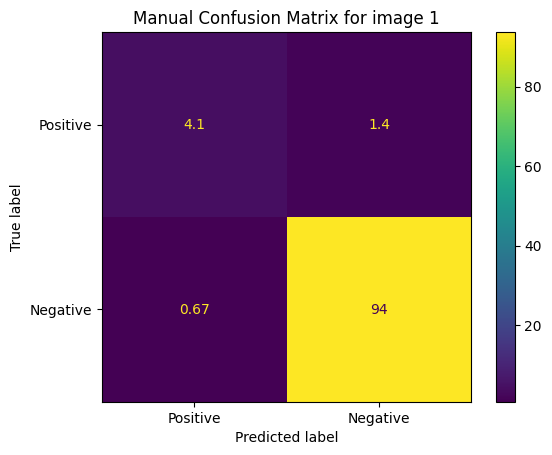

Matrix of mistakes for image 1:



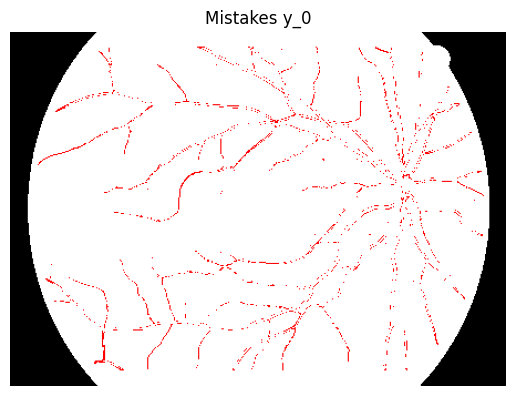

Processing confusion matrix for image 2
True Positive for image 2: 4985
False Positive for image 2: 811
False Negative for image 2: 1750
True Negative for image 2: 113537

Accuracy for image 2: 0.9788
Sensitivity for image 2: 0.7402
Specificity for image 2: 0.9929
Average Sensitivity and Specificity for image 2: 0.8665



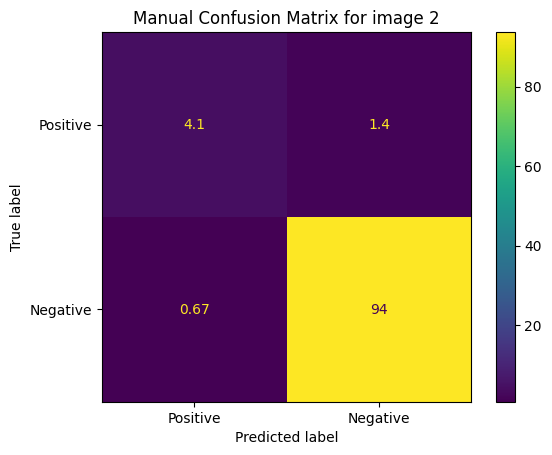

Matrix of mistakes for image 2:



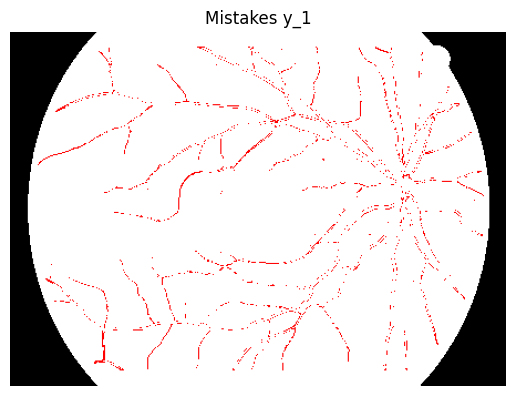

Processing confusion matrix for image 3
True Positive for image 3: 4985
False Positive for image 3: 811
False Negative for image 3: 1750
True Negative for image 3: 113537

Accuracy for image 3: 0.9788
Sensitivity for image 3: 0.7402
Specificity for image 3: 0.9929
Average Sensitivity and Specificity for image 3: 0.8665



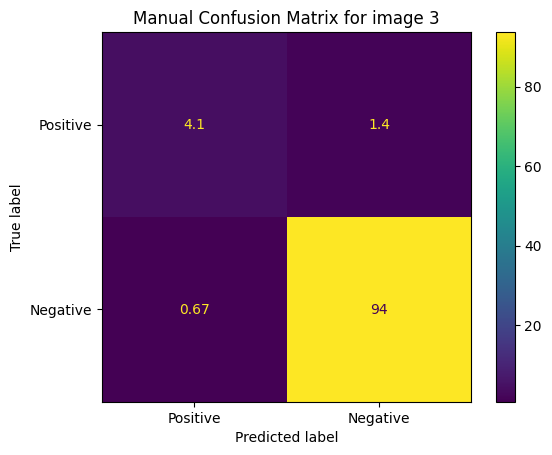

Matrix of mistakes for image 3:



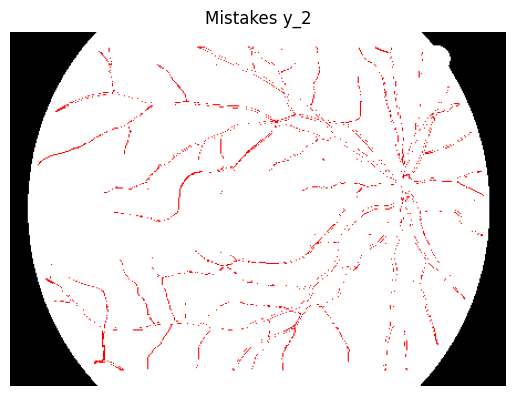

Processing confusion matrix for image 4
True Positive for image 4: 4985
False Positive for image 4: 811
False Negative for image 4: 1750
True Negative for image 4: 113537

Accuracy for image 4: 0.9788
Sensitivity for image 4: 0.7402
Specificity for image 4: 0.9929
Average Sensitivity and Specificity for image 4: 0.8665



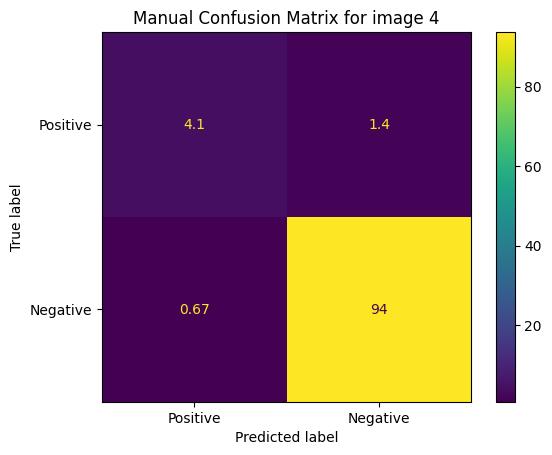

Matrix of mistakes for image 4:



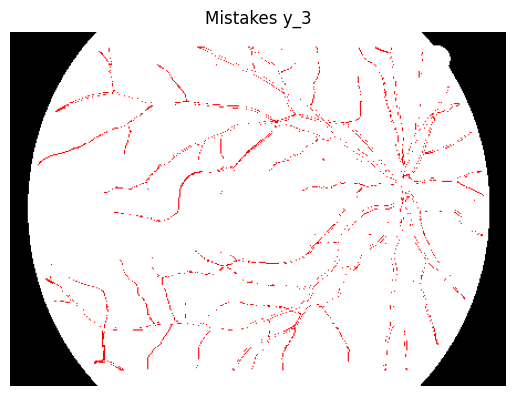

Processing confusion matrix for image 5
True Positive for image 5: 4985
False Positive for image 5: 811
False Negative for image 5: 1750
True Negative for image 5: 113537

Accuracy for image 5: 0.9788
Sensitivity for image 5: 0.7402
Specificity for image 5: 0.9929
Average Sensitivity and Specificity for image 5: 0.8665



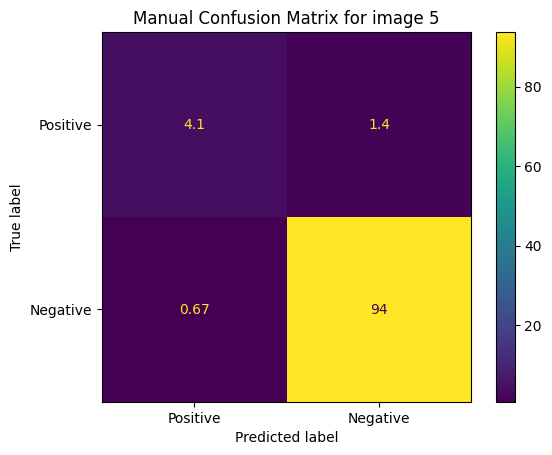

Matrix of mistakes for image 5:



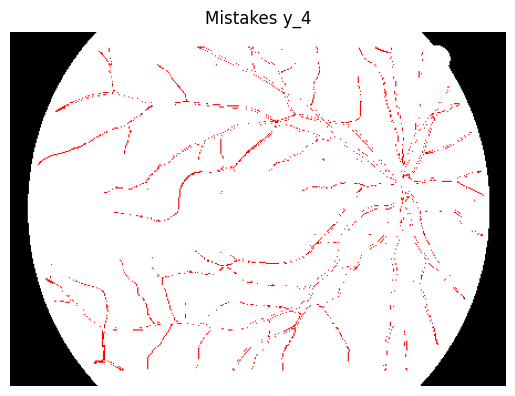

In [60]:
print("Confusion Matrices using original size of experts_images and our_images:\n")

mask_path = "mask/01_dr_mask.tif"
mask_image = Image.open(mask_path).convert('L')

# Apply binary threshold
threshold = 127
experts_images_bin = [np.where(img > threshold, 255, 0) for img in experts_images]
our_images_bin = [np.where(img > threshold, 255, 0) for img in our_images]

calculate_confusion_matrix_and_display(experts_images_bin, our_images_bin, mask_image, resize_mask=True)




## Używanie oryginalnego rozmiaru obrazów `ground_truth`, zmieninie rozmiar `our_images` do tego rozmiaru.

Confusion Matrices using original size of ground_truth_images and resize our_images to this size:

Processing confusion matrix for image 1
True Positive for image 1: 49828
False Positive for image 1: 281371
False Negative for image 1: 497345
True Negative for image 1: 6084447

Accuracy for image 1: 0.8874
Sensitivity for image 1: 0.0911
Specificity for image 1: 0.9558
Average Sensitivity and Specificity for image 1: 0.5234



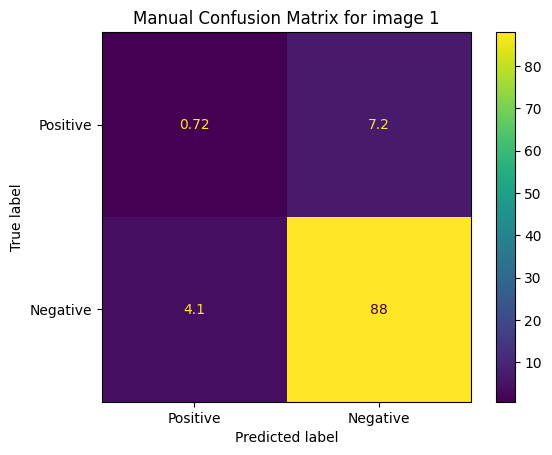

Matrix of mistakes for image 1:



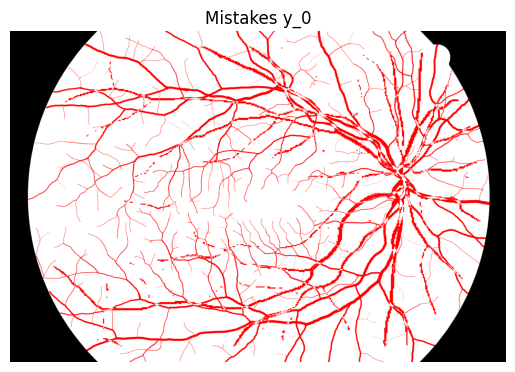

Processing confusion matrix for image 2
True Positive for image 2: 55178
False Positive for image 2: 276021
False Negative for image 2: 778458
True Negative for image 2: 5803334

Accuracy for image 2: 0.8475
Sensitivity for image 2: 0.0662
Specificity for image 2: 0.9546
Average Sensitivity and Specificity for image 2: 0.5104



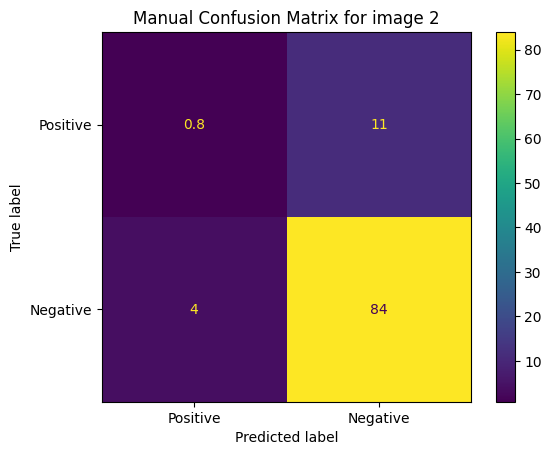

Matrix of mistakes for image 2:



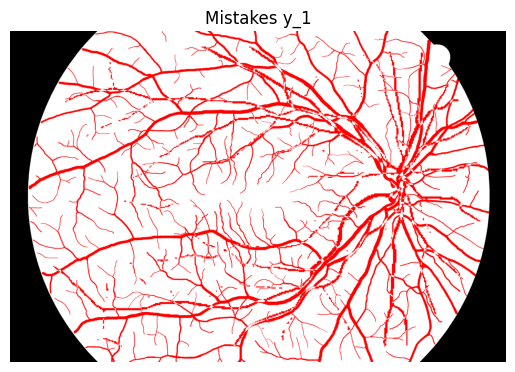

Processing confusion matrix for image 3
True Positive for image 3: 30955
False Positive for image 3: 300244
False Negative for image 3: 577865
True Negative for image 3: 6003927

Accuracy for image 3: 0.8730
Sensitivity for image 3: 0.0508
Specificity for image 3: 0.9524
Average Sensitivity and Specificity for image 3: 0.5016



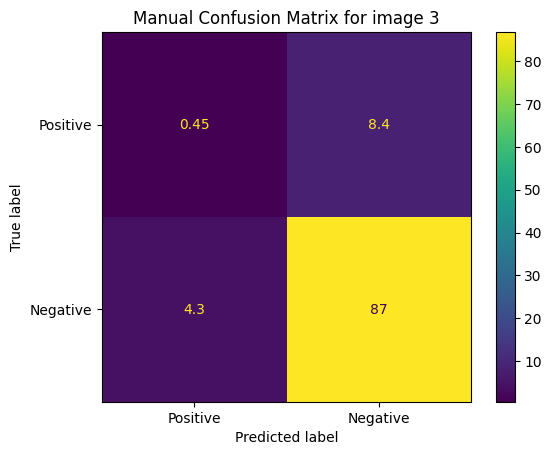

Matrix of mistakes for image 3:



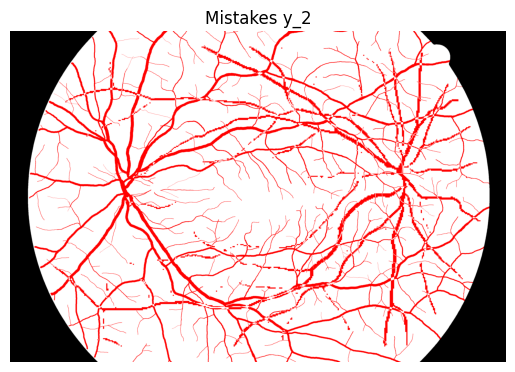

Processing confusion matrix for image 4
True Positive for image 4: 37804
False Positive for image 4: 293395
False Negative for image 4: 770346
True Negative for image 4: 5811446

Accuracy for image 4: 0.8461
Sensitivity for image 4: 0.0468
Specificity for image 4: 0.9519
Average Sensitivity and Specificity for image 4: 0.4994



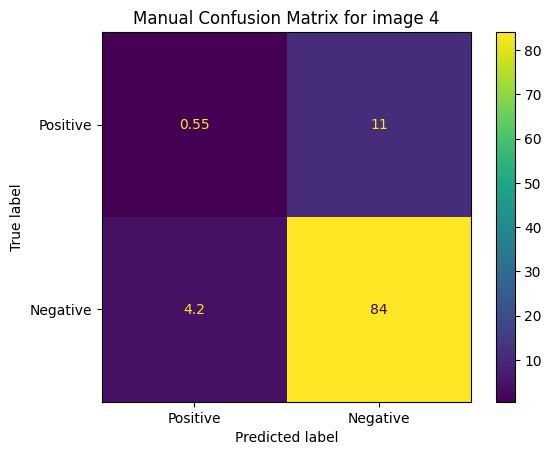

Matrix of mistakes for image 4:



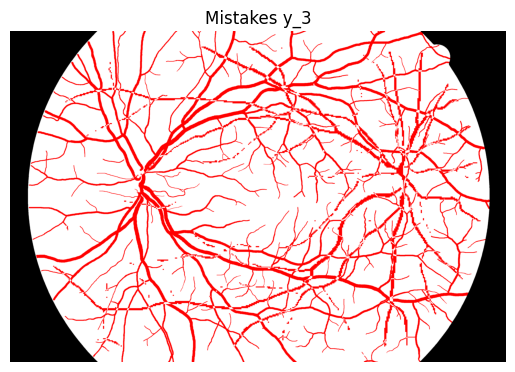

Processing confusion matrix for image 5
True Positive for image 5: 42931
False Positive for image 5: 288268
False Negative for image 5: 429691
True Negative for image 5: 6152101

Accuracy for image 5: 0.8961
Sensitivity for image 5: 0.0908
Specificity for image 5: 0.9552
Average Sensitivity and Specificity for image 5: 0.5230



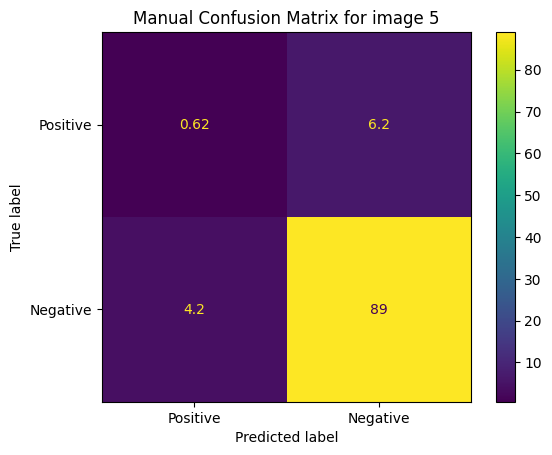

Matrix of mistakes for image 5:



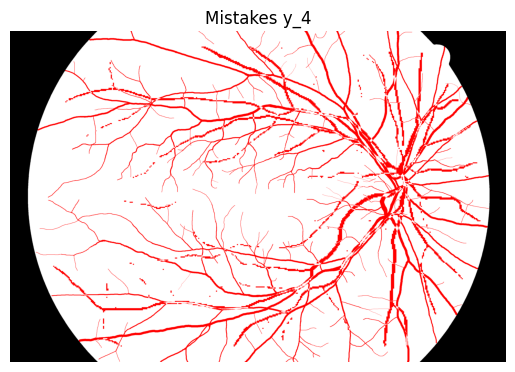

In [61]:
print("Confusion Matrices using original size of ground_truth_images and resize our_images to this size:\n")

gt_images_bin = [np.where(img > threshold, 255, 0) for img in ground_truth_images]
our_images_resized = [resize_image(img, ground_truth_images[i].shape[::-1]) for i, img in enumerate(our_images_bin)]

calculate_confusion_matrix_and_display(gt_images_bin, our_images_resized, mask_image, resize_mask=True)



## Używanie średniego rozmiaru między obrazami `ground_truth` a `our_images`

Confusion Matrices using the average size between ground_truth_images and our_images:

Processing confusion matrix for image 1
True Positive for image 1: 15879
False Positive for image 1: 90215
False Negative for image 1: 159706
True Negative for image 1: 1950408

Accuracy for image 1: 0.8872
Sensitivity for image 1: 0.0904
Specificity for image 1: 0.9558
Average Sensitivity and Specificity for image 1: 0.5231



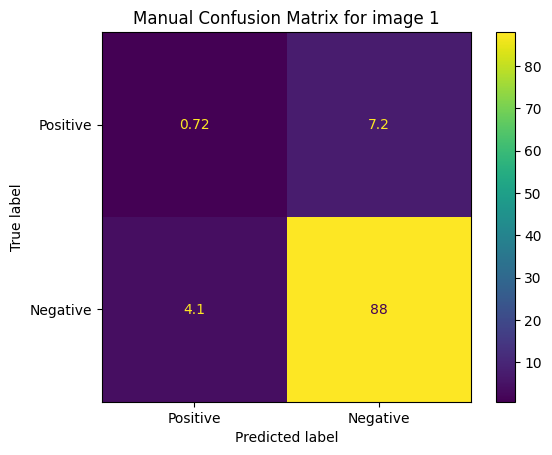

Matrix of mistakes for image 1:



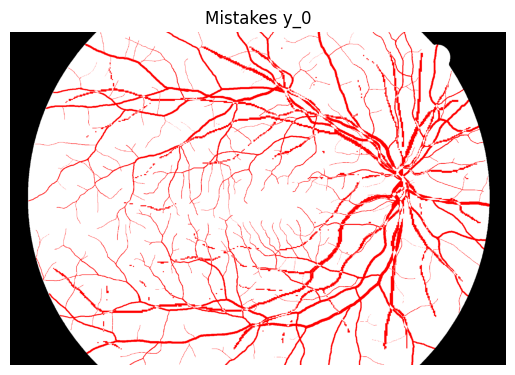

Processing confusion matrix for image 2
True Positive for image 2: 17775
False Positive for image 2: 88319
False Negative for image 2: 249518
True Negative for image 2: 1860596

Accuracy for image 2: 0.8476
Sensitivity for image 2: 0.0665
Specificity for image 2: 0.9547
Average Sensitivity and Specificity for image 2: 0.5106



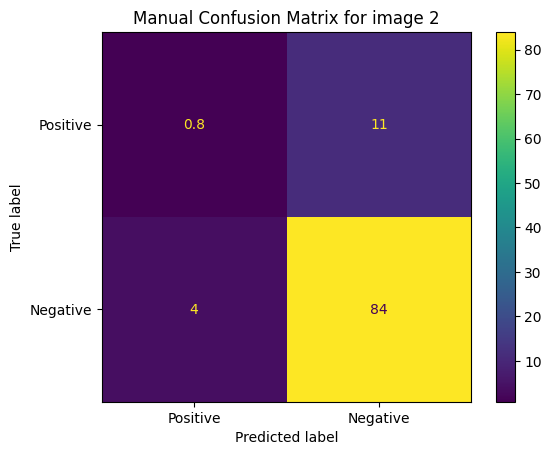

Matrix of mistakes for image 2:



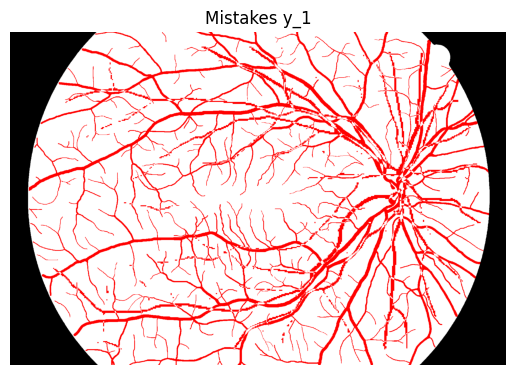

Processing confusion matrix for image 3
True Positive for image 3: 9887
False Positive for image 3: 96207
False Negative for image 3: 185271
True Negative for image 3: 1924843

Accuracy for image 3: 0.8730
Sensitivity for image 3: 0.0507
Specificity for image 3: 0.9524
Average Sensitivity and Specificity for image 3: 0.5015



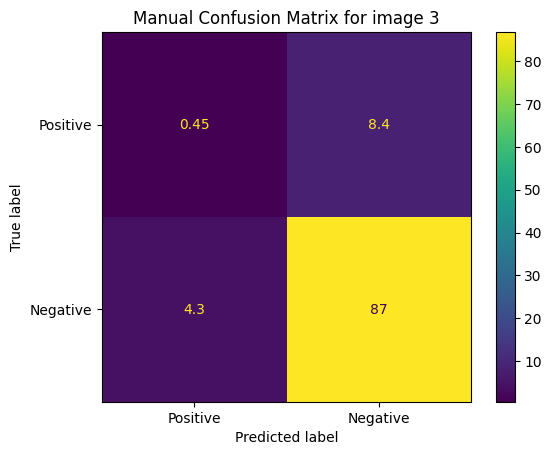

Matrix of mistakes for image 3:



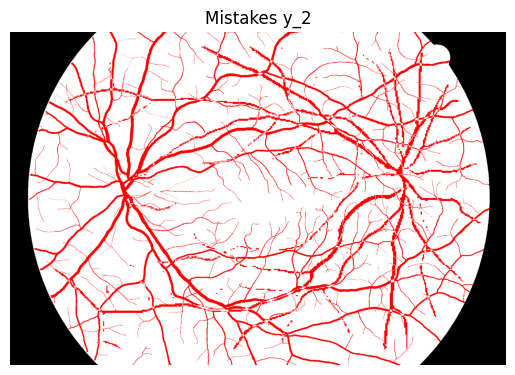

Processing confusion matrix for image 4
True Positive for image 4: 12072
False Positive for image 4: 94022
False Negative for image 4: 246878
True Negative for image 4: 1863236

Accuracy for image 4: 0.8462
Sensitivity for image 4: 0.0466
Specificity for image 4: 0.9520
Average Sensitivity and Specificity for image 4: 0.4993



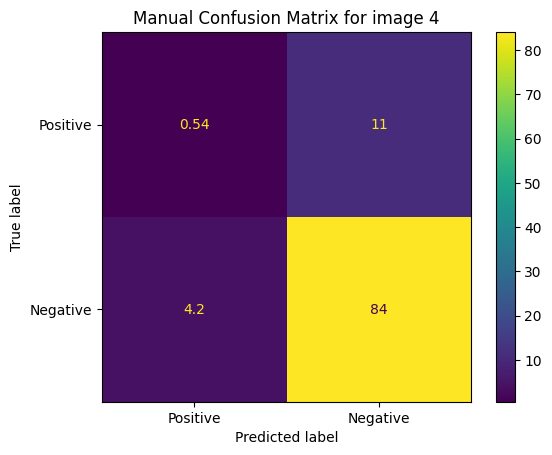

Matrix of mistakes for image 4:



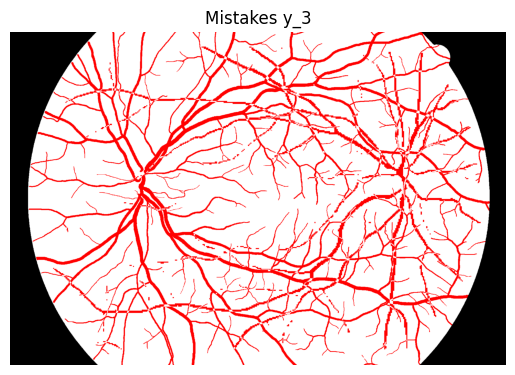

Processing confusion matrix for image 5
True Positive for image 5: 13735
False Positive for image 5: 92359
False Negative for image 5: 137914
True Negative for image 5: 1972200

Accuracy for image 5: 0.8961
Sensitivity for image 5: 0.0906
Specificity for image 5: 0.9553
Average Sensitivity and Specificity for image 5: 0.5229



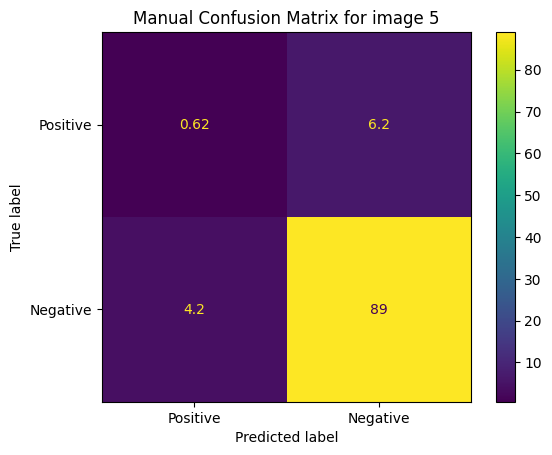

Matrix of mistakes for image 5:



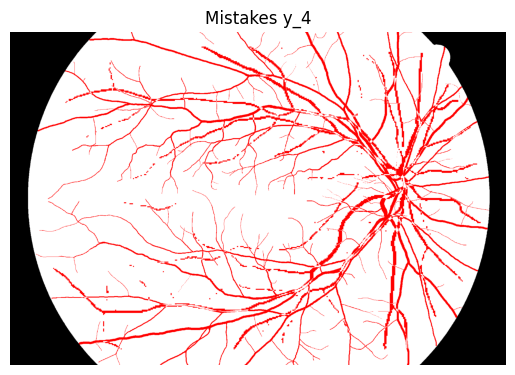

In [62]:

print("Confusion Matrices using the average size between ground_truth_images and our_images:\n")

# Calculate average dimensions
all_images = ground_truth_images + our_images
avg_height = int(np.mean([img.shape[0] for img in all_images]))
avg_width = int(np.mean([img.shape[1] for img in all_images]))
average_size = (avg_width, avg_height)

gt_images_resized = [resize_image(img, average_size) for img in ground_truth_images]
our_images_resized = [resize_image(img, average_size) for img in our_images_bin]

calculate_confusion_matrix_and_display(gt_images_resized, our_images_resized, mask_image, resize_mask=True)

## Wyjasnienie
#### Ponieważ po użyciu sieci neuronowych UNET zmieniły się rozmiary oryginalnych obrazów, co spowodowało zmniejszenie liczby pikseli i dla tych obrazów macierz błędów była zawsze taka sama, zdecydowaliśmy się zmienić rozmiary naszych obrazów. Przeprowadziliśmy 3 eksperymenty:

#### 1) rozmiary jak w `our_images`
#### 2) rozmiary jak w `ground_truth`
#### 3) średnia wartość rozmiaru między `our_images` i `ground_truth`